In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets

In [8]:
# import some data to play with

iris = datasets.load_iris()
X = iris.data[:,:2] # we only take the irst two features. We could avoid thus ugly slicing by using a two-dim dataset
y = iris.target

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# we create an instance of SVM and fit our data.
# we do not scale our data since we want to plot the support vectors

C=1.0 # SVM Regularization Parameter
# svc = svm.SVC(kernel='linear',C=10, gamma=100).fit(X,y)
# svc = svm.SVC(kernel='rbf',C=1, gamma=1000).fit(X,y)   # try changing the gamma value 10 100, c == 1, 100, 1000
svc = svm.SVC(kernel='rbf',C=10, gamma='auto').fit(X,y)

In [12]:
# gamma = you can say that it may act to control the curvature
# gamma represent the influence area of the support vectors
# if gamma is high = vector's influence have very less area (cannot bifarcate the classes properly)
# if gamma is low = vector's influence may have a whole dataset region (can bifarcate the classes properly)

In [11]:
X[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [13]:
# Create a mesh to plot in

xmin, xmax = X[:,0].min()-1, X[:,0].max()+1
ymin, ymax = X[:,1].min()-1, X[:,1].max()+1

h = (xmax/xmin)/100
xx, yy = np.meshgrid(np.arange(xmin,xmax,h), np.arange(ymin,ymax,h))

In [15]:
xx.shape

(164, 208)

In [16]:
yy.shape

(164, 208)

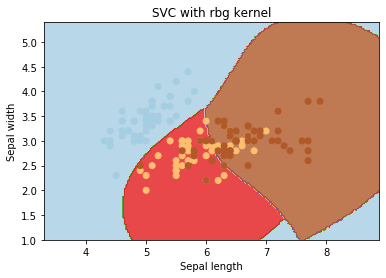

In [24]:
plt.subplot(1,1,1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
# plt.ylim(yy.min(),yy.max())
plt.title('SVC with rbg kernel')
plt.show()